In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install beautifulsoup4
!pip install pandas
!pip install nltk

In [ ]:
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
import re
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://www.vagalume.com.br/ariana-grande/'
data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
songs = soup.find(id="alfabetMusicList")
urls = []
song_names = []

for song in songs.find_all(class_="nameMusic"):
  song_names.append(song.text)
  urls.append('https://www.vagalume.com.br/' + song['href'])

print(urls)

In [ ]:
song_lyrics = {}

for url_songs, song_name in zip(urls, song_names):
  data_songs = requests.get(url_songs).text
  soup_songs = BeautifulSoup(data_songs, 'html.parser')

  for br in soup_songs.select("br"):
      br.replace_with(" ")

  song_lyrics[song_name] = soup_songs.find(id="lyrics").text.lower().replace(",","").replace("  ", " ")

In [ ]:
df = pd.DataFrame({'Song':song_lyrics.keys(),'Lyrics':song_lyrics.values()})
df.to_csv("/content/drive/MyDrive/all_songs_up.csv", sep ='\t')

In [ ]:
stop_words = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "i'm", "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "'m", ",", ".", "n't", "'ll", "?", "wo", "la", "'s" "'d", "n't", "...", '``', "'ve", "'", "might", "''", '(', ')', "'s", "'d", 'mm-mm', 'hmm', 'ah', 'ah',"!", "oh", ":", "'re","aye", "na", "'d", "ay", "yo", 'mm','hey', 'woo', "ai", "gon", "get", "got", "-"])

In [ ]:
nlp = spacy.load("en_core_web_sm")
frequency = defaultdict(int)

for song in song_lyrics.values():
  for word in nlp(song):
    if word.text not in stop_words:
      frequency[word.lemma_] += 1

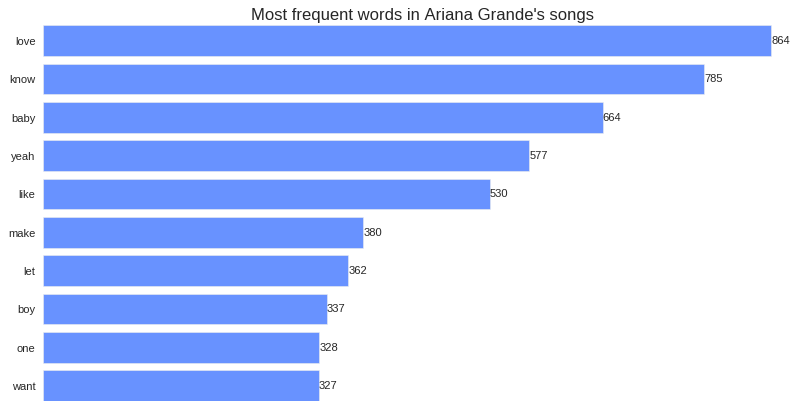

In [538]:
df_freq = pd.DataFrame({'Word':frequency.keys(), 'Frequency':frequency.values()}).sort_values(by=['Frequency'],ascending=False, ignore_index=True)
df_freq_subset = df_freq.head(10)

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
bars = ax.barh(df_freq_subset.Word, df_freq_subset.Frequency, color='#6892ff')
ax.bar_label(bars)
ax.invert_yaxis()
#ax.set_xlabel('Frequency')
#ax.set_ylabel('Word')
ax.set_xticks([])
ax.set_facecolor('white')
ax.set_title("Most frequent words in Ariana Grande's songs", fontsize = 15)
fig.savefig('/content/drive/MyDrive/testmdss.png', facecolor='white', bbox_inches='tight', dpi=300)

